In [78]:
# Import Packages and Load Data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel('Test_BDS.xlsx',sheet_name='Raw data')
df.head()

,user_id,category,favorite_service,create_time,first_time,recency,frequency,stoppoint,gsv,discount,discount_using,gmv
0,1.0,FASHION,BIKE,2015-06-11,2022-04-04,0.0,18.0,25.0,1215000.0,52000.0,0.160000,0.0
1,2.0,INDIVIDUAL NEEDS,BIKE,2015-06-23,2022-03-20,4.0,23.0,31.0,1395000.0,25000.0,0.096774,0.0
2,3.0,FASHION,BIKE,2015-07-02,2022-03-14,0.0,59.0,192.0,12311000.0,395000.0,0.145833,0.0
3,4.0,INDIVIDUAL NEEDS,BIKE,2015-08-10,2022-02-20,99.0,1.0,1.0,64000.0,10000.0,1.000000,0.0
4,5.0,SPORT,BIKE,2015-08-10,2022-05-05,19.0,2.0,2.0,136000.0,1000.0,0.000000,0.0


In [110]:
# Clean data 
df = df.dropna(how='any') #drop NaN values

In [59]:
df['gsv'] = pd.to_numeric(df['gsv'], downcast='integer')
df['recency'] = pd.to_numeric(df['recency'], downcast='integer')
df['stoppoint'] = pd.to_numeric(df['stoppoint'], downcast='integer')
df['discount'] = pd.to_numeric(df['discount'], downcast='integer')

In [60]:
df.head()

,user_id,category,favorite_service,create_time,first_time,recency,frequency,stoppoint,gsv,discount,discount_using,gmv
0,1.0,FASHION,BIKE,2015-06-11,2022-04-04,0,18.0,25,1215000,52000,0.160000,0.0
1,2.0,INDIVIDUAL NEEDS,BIKE,2015-06-23,2022-03-20,4,23.0,31,1395000,25000,0.096774,0.0
2,3.0,FASHION,BIKE,2015-07-02,2022-03-14,0,59.0,192,12311000,395000,0.145833,0.0
3,4.0,INDIVIDUAL NEEDS,BIKE,2015-08-10,2022-02-20,99,1.0,1,64000,10000,1.000000,0.0
4,5.0,SPORT,BIKE,2015-08-10,2022-05-05,19,2.0,2,136000,1000,0.000000,0.0


In [94]:
# Question 3a: Which category make the highest gross shipping value (gsv)?
gsv_category = df.groupby('category').sum()['gsv']
gsv_category

category
CAKE                   2.372469e+08
CIGARETTE              2.503090e+08
DRINK                  1.781930e+08
E                      2.750000e+06
E-commerce platform    4.880000e+05
ELECTRONICS            6.503910e+08
Electronics            5.722000e+06
FASHION                1.926919e+09
FOOD                   2.663540e+09
Fashion & Sport        8.519200e+07
Food & Drink           8.406400e+07
GROCERY                1.577477e+09
HEALTH & BEAUTY        1.300829e+09
HOUSING & LIFESTYLE    8.499694e+08
Health & Beauty        2.841300e+07
Home & Lifestyle       2.183200e+07
INDIVIDUAL NEEDS       1.106317e+10
MOTHER & BABY          3.082690e+08
Mother & Baby          2.316526e+07
OTHER                  2.090842e+09
Other                  1.193100e+07
Others                 8.377000e+06
RESTAURANT             1.791610e+08
SPORT                  8.154598e+07
TRANSPORTATION         1.011060e+08
Transportation         4.633000e+06
Name: gsv, dtype: float64

In [107]:
gsv_category.max()

11063167432.0

In [111]:
category = set(df['category']) 
ypos = np.arange(len(category))
ypos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

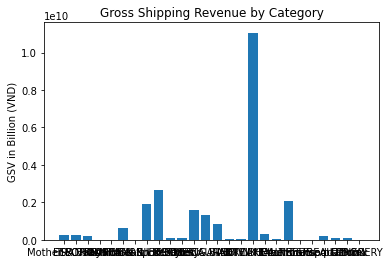

In [119]:
plt.xticks(ypos,category)
plt.bar(x=ypos, height=gsv_category)
plt.title('Gross Shipping Revenue by Category')
plt.ylabel('GSV in Billion (VND)')
plt.show()

In [ ]:
# Conclusion: Individual Needs is the category with the highest gross shipping revenue

In [150]:
# Question 3b: Customer Characteristics Analysis
# By Favorite Service
service_name = set(df['favorite_service'])
service_freq = df['favorite_service'].value_counts()
percentage = (service_freq/service_freq.sum())*100
percentage

BIKE           51.311780
POOL           15.500835
SAMEDAY        11.431807
GOSHOP         10.958936
TRICYCLE        4.190456
EXPRESS         2.357351
VAN-500         1.700001
INTERCT-GHN     0.932899
TRUCK-500       0.757762
TRUCK-1000      0.475206
VAN-1000        0.270879
TRUCK-2000      0.112088
Name: favorite_service, dtype: float64

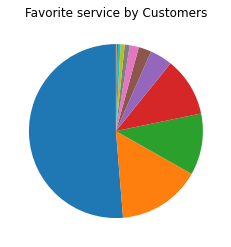

In [176]:
plt.pie(percentage, startangle=90)
plt.title('Favorite service by Customers')
plt.show()

In [ ]:
# BIKE is the most preferred service chosen by customers, accounting for over 50% of total customers' choices.

In [154]:
# By Create Time
# Add Create Year column
df['create_year'] = df['create_time'].str[0:4]
df.head()

,user_id,category,favorite_service,create_time,first_time,recency,frequency,stoppoint,gsv,discount,discount_using,gmv,creat_year,create_year
0,1.0,FASHION,BIKE,2015-06-11,2022-04-04,0.0,18.0,25.0,1215000.0,52000.0,0.160000,0.0,2015,2015
1,2.0,INDIVIDUAL NEEDS,BIKE,2015-06-23,2022-03-20,4.0,23.0,31.0,1395000.0,25000.0,0.096774,0.0,2015,2015
2,3.0,FASHION,BIKE,2015-07-02,2022-03-14,0.0,59.0,192.0,12311000.0,395000.0,0.145833,0.0,2015,2015
3,4.0,INDIVIDUAL NEEDS,BIKE,2015-08-10,2022-02-20,99.0,1.0,1.0,64000.0,10000.0,1.000000,0.0,2015,2015
4,5.0,SPORT,BIKE,2015-08-10,2022-05-05,19.0,2.0,2.0,136000.0,1000.0,0.000000,0.0,2015,2015


In [171]:
new_user = df['create_year'].value_counts()
new_user

2022    61575
2021    15880
2020     4154
2018     2698
2019     1012
2017      219
2016       89
2015       20
Name: create_year, dtype: int64

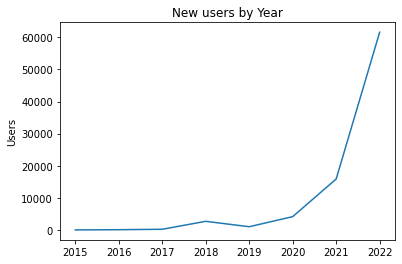

In [180]:
new_user_by_year = np.array([20,89,219,2698,1012,4154,15880,61575])
year = range(2015,2023)
plt.plot(year,new_user_by_year)
plt.title('New users by Year')
plt.ylabel('Users')
plt.show()

In [ ]:
# Ahamove's number of new users rose gradually in the period from 2015 to 2020 
# increased dramatically from 2021 up to present time 
# Ahamove has a particularly strong growth in resspect of new customers in the past few years